# Atividade - Semana 12 - Estatística Descritiva

Esta é atividade semanal sugerida. Você deverá preenchê-la e enviá-la dentro do prazo (até o fechamento da semana corrente).

###Questão 1

> _O mercado americano representa cerca de 60% do mercado de ações mundial, e boa parte disso se deve às maiores empresas do país. Afinal, embora elas sejam radicadas nos Estados Unidos e estejam listadas na bolsa americana, sua atuação é global._
>
> * _https://warren.com.br/magazine/maiores-acoes-americanas/_

A partir dos _tickers_ fornecidos:

> a) Obtenha os dados `Adj Close` e `Volume` destas ações para o 1o **semestre** de 2023. Utilize o pacote `yfinance`.
>
> b) Calcule o retorno destas ações. Resuma utilizando a `média`.
>
> c) Utilizando a função `KMeans`, agrupe as ações em 4 _clusters_.
>
> d) Visualize o resultado do agrupamento.

In [5]:
# Questao 1
# Letra a)

# Carregando pacotes
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Tickers
tickers = ["AAPL", "AMZN", "BRK-B", "GOOG", "JNJ",
           "META", "MSFT", "TSLA", "UNH", "V" ]

# Obtendo dados
df_ADJ = yf.download(tickers,                # Ação
                         start="2023-01-01",     # Data inicial AAAA-MM-DD
                         end="2023-06-30",       # Data final AAAA-MM-DD
                         progress=False).iloc[:, list(range(10))]
                         # Selecionando as 10 primeiras colunas

df_volume = yf.download(tickers,                # Ação
                        start="2023-01-01",     # Data inicial AAAA-MM-DD
                        end="2023-06-30",       # Data final AAAA-MM-DD
                        progress=False).iloc[:, list(range(-10, 0))]
                        # Selecionando as 10 ultimas colunas

# Renomeando colunas
df_ADJ.columns = tickers
df_volume.columns = tickers

# Visualizando resultado adj
df_ADJ
# Visualizando resultado volume ( remova o comentário)
#df_volume

,AAPL,AMZN,BRK-B,GOOG,JNJ,META,MSFT,TSLA,UNH,V
Date,,,,,,,,,,
2023-01-03,124.538658,85.820000,309.910004,89.699997,174.326996,124.739998,237.956329,108.099998,512.690674,206.194107
2023-01-04,125.823189,85.139999,314.549988,88.709999,176.224945,127.370003,227.547363,113.639999,498.712860,211.384018
2023-01-05,124.488876,83.120003,312.899994,86.769997,174.923767,126.940002,220.803360,110.339996,484.339630,209.892670
2023-01-06,129.069321,86.080002,318.690002,88.160004,176.342331,130.020004,223.405609,113.059998,484.379211,216.494385
2023-01-09,129.597061,87.360001,315.529999,88.800003,171.773575,129.470001,225.580765,119.769997,484.438507,217.339478
...,...,...,...,...,...,...,...,...,...,...
2023-06-23,186.428238,129.330002,335.250000,123.019997,164.287186,288.730011,334.312164,256.600006,475.150269,229.119156
2023-06-26,185.020157,127.330002,334.119995,119.089996,162.450531,278.470001,327.905762,241.050003,477.202301,225.875259
2023-06-27,187.806381,129.179993,335.339996,119.010002,162.112976,287.049988,333.863159,250.210007,480.688721,226.913300


In [6]:
# Questao 1
# Letra b)
# Calculando retorno percentual
# > Para cada colunas de `df_share`,
# > substituo o valor pelo retorno percentual
for col in df_ADJ.columns:
  df_ADJ[col] = df_ADJ[col].pct_change() * 100

# Removendo a primeira linha em ambos
df_ADJ = df_ADJ.iloc[1:]
df_volume = df_volume.iloc[1:]

# Crie um novo DataFrame com a média das colunas
df_indicadores = pd.DataFrame([df_ADJ.mean(),
                               df_volume.mean() / 100000], # Divisão por 100.000
                                                           # para melhor visualização
                              index = ['Retorno', 'Volume'],
                              columns=tickers)


# Invertendo linhas por colunas
df_indicadores = df_indicadores.transpose()

# Visualizando resultado
df_indicadores


,Retorno,Volume
AAPL,0.352260,624.253869
AMZN,0.352432,656.208885
BRK-B,0.073003,35.791959
GOOG,0.261212,292.198836
JNJ,-0.050687,75.548795
META,0.712407,276.264451
MSFT,0.295110,301.363385
TSLA,0.777151,1567.044508
UNH,-0.052593,35.141230
V,0.109325,64.136959


In [13]:
# Questao 1
# Letra c)
# Carregando pacote e partes necessarias
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt

# Interligando passos
pipeline = make_pipeline(
    StandardScaler(),          # Padronizando dados
    KMeans(n_clusters=4,       # Num de grupos
           random_state = 999, # Semente aleatória (pode usar a que você quiser)
           n_init = "auto")    # Mantenha essa opção no "auto"
)

# Agrupamento
grupos_acoes = pipeline.fit(df_indicadores) # DataFrame com as métricas

# Juntando o grupo calculado com os indicadores
df_indicadores['Grupo'] = grupos_acoes.predict(df_indicadores)
df_indicadores

,Retorno,Volume,Grupo
AAPL,0.352260,624.253869,0
AMZN,0.352432,656.208885,0
BRK-B,0.073003,35.791959,1
GOOG,0.261212,292.198836,0
JNJ,-0.050687,75.548795,1
META,0.712407,276.264451,2
MSFT,0.295110,301.363385,0
TSLA,0.777151,1567.044508,3
UNH,-0.052593,35.141230,1
V,0.109325,64.136959,1


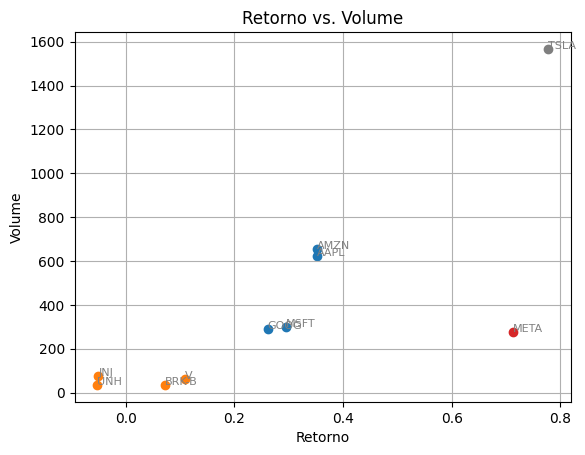

In [15]:
# Questao 1
# Letra d)
# Gráfico de dispersão
plt.scatter(df_indicadores['Retorno'], df_indicadores['Volume'], c='white')

# Lista de cores
cores_grupo = ['tab:blue', 'tab:orange','tab:red','tab:gray']

# Adicionando rótulos aos pontos
for i, txt in enumerate(tickers):
    plt.annotate(txt, (df_indicadores['Retorno'][i], df_indicadores['Volume'][i]),
                 fontsize=8, ha='left', c='grey')
    plt.scatter(df_indicadores['Retorno'][i],
                df_indicadores['Volume'][i],
                c=cores_grupo[df_indicadores['Grupo'][i]])

# Definindo rótulos dos eixos
plt.xlabel('Retorno')
plt.ylabel('Volume')

# Definindo o título do gráfico
plt.title('Retorno vs. Volume')

# Exibindo o gráfico
plt.grid(True)
plt.show()

###Questão 2

> *O conjunto de dados abaixo contém informações sobre as 50 principais empresas de tecnologia dos EUA em 2022.*

A partir destes dados, responda:

> a) Utilizando a função `KMeans`, agrupe as ações em 3 _clusters_.
>
> b) Visualize o resultado do agrupamento.
>
> c) Quais empresas compõem o grupo que mais se destaca positivamente?

In [10]:
# Questao 2
# NAO ALTERE ESSES COMANDOS
# A BASE SERA CARREGADA NO OBJETO `top_empresas`
# USE ESSE OBJETO PARA SEGUIR COM OS EXERCICIOS
import gdown
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

url = 'https://drive.google.com/uc?id=1LGiTpuJWm0Djm4Aozgjy0x0uZ_ldo9xN'
output = 'top_empresas.csv'
gdown.download(url, output, quiet=True)

# Editando DataFrame
top_empresas = pd.read_csv('/content/top_empresas.csv')
top_empresas.index = top_empresas['Company Name']
top_empresas = top_empresas.iloc[:, [5, 6]]
top_empresas.columns = ['receita_anual', 'valor_mercado']

# Visualizando resultado
top_empresas

,receita_anual,valor_mercado
Company Name,,
Apple Inc.,387.53,2.520
Microsoft Corporation,204.09,2.037
Alphabet (Google),282.83,1.350
Amazon,513.98,1.030
NVIDIA Corporation,26.97,0.653
Tesla,81.46,0.625
Meta Platforms,116.60,0.524
Broadcom Inc.,34.41,0.266
Oracle Corporation,46.07,0.236


In [17]:
# Questao 2
# Letra a)
# Interligando passos
pipeline = make_pipeline(
    StandardScaler(),          # Padronizando dados
    KMeans(n_clusters=3,       # Num de grupos
           random_state = 999, # Semente aleatória (pode usar a que você quiser)
           n_init = "auto")    # Mantenha essa opção no "auto"
)

# Agrupamento
grupos_acoes = pipeline.fit(top_empresas) # DataFrame com as métricas

# Juntando o grupo calculado com os indicadores
top_empresas['Grupo'] = grupos_acoes.predict(top_empresas)
top_empresas

,receita_anual,valor_mercado,Grupo
Company Name,,,
Apple Inc.,387.53,2.520,0
Microsoft Corporation,204.09,2.037,2
Alphabet (Google),282.83,1.350,2
Amazon,513.98,1.030,2
NVIDIA Corporation,26.97,0.653,1
Tesla,81.46,0.625,1
Meta Platforms,116.60,0.524,1
Broadcom Inc.,34.41,0.266,1
Oracle Corporation,46.07,0.236,1


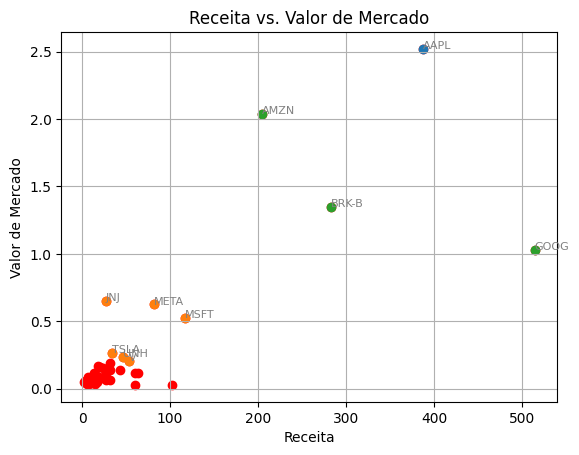

In [23]:
# Questao 2
# Letra b)
# Juntando o grupo calculado com os indicadores
top_empresas['Grupo'] = grupos_acoes.predict(top_empresas)
top_empresas

# Gráfico de dispersão
plt.scatter(top_empresas['receita_anual'], top_empresas['valor_mercado'], color='red')

# Lista de cores
cores_grupo = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

# Adicionando rótulos aos pontos
for i, txt in enumerate(tickers):
    plt.annotate(txt, (top_empresas['receita_anual'][i], top_empresas['valor_mercado'][i]),
                 fontsize=8, ha='left', c='grey')
    plt.scatter(top_empresas['receita_anual'][i],
                top_empresas['valor_mercado'][i],
                c=cores_grupo[top_empresas['Grupo'][i]])

# Definindo rótulos dos eixos
plt.xlabel('Receita')
plt.ylabel('Valor de Mercado')

# Definindo o título do gráfico
plt.title('Receita vs. Valor de Mercado')

# Exibindo o gráfico
plt.grid(True)
plt.show()

In [25]:
# Questao 2
# Letra c)
#Grupo verde e Azul são os que se destacam.